In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df_list = []

In [3]:
# folder_path = '../../Dataset/Group04/LS_Group04/'
folder_path = '../../Dataset/Group04/rd_group4/'
all_entries = os.listdir(folder_path)

In [4]:
print(all_entries)


['class1.txt', 'class2.txt', 'class3.txt']


In [5]:
for entry in all_entries:
    class_label = entry.split('.')[0]
    file_path = folder_path+entry
    print(file_path)
    temp_df = pd.read_csv(file_path, names=['Feature1',"Feature2"], delim_whitespace=True)
    temp_df['Class'] = class_label
    df_list.append(temp_df)
    print(temp_df)

../../Dataset/Group04/rd_group4/class1.txt
       Feature1    Feature2   Class
0     328.12500   734.37500  class1
1     261.71875   730.46875  class1
2     300.78125   667.96875  class1
3     324.21875   691.40625  class1
4     320.31250   625.00000  class1
...         ...         ...     ...
2483  324.21875   875.00000  class1
2484  312.50000   730.46875  class1
2485  296.87500  1000.00000  class1
2486  343.75000   765.62500  class1
2487  925.78125  1000.00000  class1

[2488 rows x 3 columns]
../../Dataset/Group04/rd_group4/class2.txt
        Feature1    Feature2   Class
0      785.15625  1152.34375  class2
1      757.81250  1136.71875  class2
2      789.06250  1085.93750  class2
3      781.25000  1101.56250  class2
4      789.06250  1105.46875  class2
...          ...         ...     ...
2159   718.75000  1113.28125  class2
2160   386.71875   777.34375  class2
2161   593.75000  1191.40625  class2
2162   726.56250  1132.81250  class2
2163  1496.09375  1500.00000  class2

[2164 rows x

In [6]:
merged_df = []

In [7]:
merged_df = pd.concat(df_list, ignore_index=True)

In [8]:
merged_df

,Feature1,Feature2,Class
0,328.12500,734.37500,class1
1,261.71875,730.46875,class1
2,300.78125,667.96875,class1
3,324.21875,691.40625,class1
4,320.31250,625.00000,class1
...,...,...,...
7035,351.56250,2398.43750,class3
7036,1613.28125,2253.90625,class3
7037,332.03125,2359.37500,class3
7038,1003.90625,1683.59375,class3


In [9]:
print(merged_df.head())

    Feature1   Feature2   Class
0  328.12500  734.37500  class1
1  261.71875  730.46875  class1
2  300.78125  667.96875  class1
3  324.21875  691.40625  class1
4  320.31250  625.00000  class1


In [10]:
merged_df.shape

(7040, 3)

In [11]:
plt.figure(figsize=(10,10))

for class_name in merged_df['Class'].unique():
    print(class_name)

class1
class2
class3


<Figure size 1000x1000 with 0 Axes>

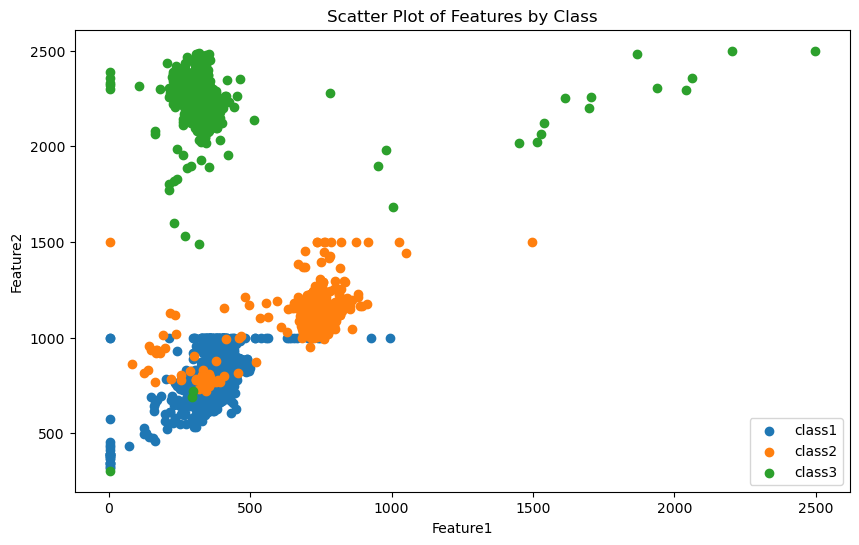

In [12]:
df = merged_df[["Feature1","Feature2","Class"]]
plt.figure(figsize=(10, 6))
for cls in df['Class'].unique():
    subset = df[df['Class'] == cls]
    plt.scatter(subset['Feature1'], subset['Feature2'], label=cls)

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter Plot of Features by Class')
plt.legend()
plt.show()

In [13]:
print(merged_df.isna().sum())

Feature1    0
Feature2    0
Class       0
dtype: int64


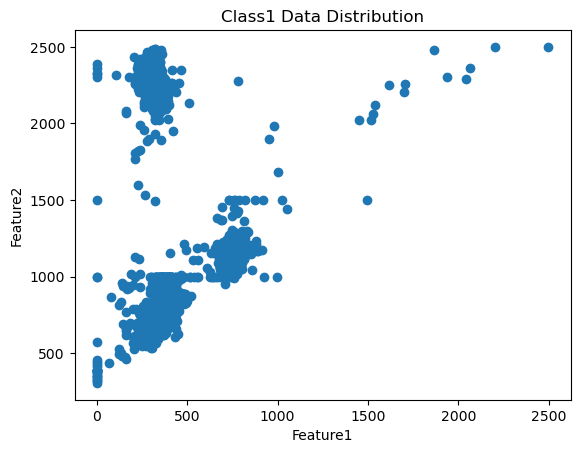

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df['Feature1'], df['Feature2'])
plt.title('Class1 Data Distribution')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

In [26]:
def mean(x: list[float]) -> float:
    ''' Docstring 
    
    '''
    return sum(x)/len(x)

def covariance(x: list[float],y: list[float]) -> float:
    ''' Docstring dfghjk
    
    '''
    if len(x) != len(y):
        raise ValueError("Length mismatch between input lists")
    numerator = 0
    x_mean = mean(x)
    y_mean = mean(y)
    for i, j in zip(x,y):
        numerator += (i-x_mean)*(j-y_mean)
        
    return numerator/(len(x)-1)

def covariance_matrix(class_data, mean_vector=0):
    n_samples = len(class_data)
    n_features = 2
    cov_matrix = [[0.0] * n_features for _ in range(n_features)]
    
    for i in range(n_features):
        for j in range(n_features):
            cov_matrix[i][j] = covariance(class_data.iloc[:, i], class_data.iloc[:, j])
    return cov_matrix

In [28]:
df['Class'].unique()

array(['class1', 'class2', 'class3'], dtype=object)

In [29]:
covariance_matrix(merged_df)

[[41283.316947506086, -42106.23062207048],
 [-42106.23062207048, 441428.28247646906]]

In [19]:
def average_variance(class_dataset):
    total_variance = 0
    total_count = 0
    for class_data in class_dataset:
        cov_mat = covariance_matrix(class_data)
        for i in range(len(cov_mat)):
            total_variance += cov_mat[i][i]
            total_count += 1
    return total_variance/total_count

def shared_covariance_matrix_sigma_squared_I(class_datasets: list):
    sigma_squared = average_variance(class_datasets)
    n_features = len(class_datasets[0].columns)
    return [[sigma_squared if i == j else 0 for j in range(n_features)] for i in range(n_features)]

In [20]:
def compute_class_means_and_priors(train_df):
    class_means = {}
    priors = {}

    total_samples = len(train_df)

    for cls in train_df['Class'].unique():
        class_data = train_df[train_df['Class'] == cls][['Feature1', 'Feature2']]
        feature1_values = class_data['Feature1'].tolist()
        feature2_values = class_data['Feature2'].tolist()
        
        mean_feature1 = sum(feature1_values) / len(feature1_values)
        mean_feature2 = sum(feature2_values) / len(feature2_values)

        class_means[cls] = [mean_feature1, mean_feature2]
        priors[cls] = len(class_data) / total_samples

    return class_means, priors

def discriminant_sigma2I(x, mean_vec, sigma2, prior):
    x = np.array(x)
    mean_vec = np.array(mean_vec)

    diff = x - mean_vec
    term1 = -0.5 * np.dot(diff.T, diff) / sigma2
    term2 = np.log(prior)

    return term1 + term2
    

def predict_sigma2I(test_df, class_means, priors, sigma2):
    predictions = []

    for _, row in test_df.iterrows():
        x = [row['Feature1'], row['Feature2']]
        scores = {}

        for cls in class_means:
            score = discriminant_sigma2I(x, class_means[cls], sigma2, priors[cls])
            scores[cls] = score

        predicted_class = max(scores, key=scores.get)
        predictions.append(predicted_class)

    return predictions



In [21]:
import numpy as np
train_df = merged_df
test_df = merged_df.copy()
class_data_train = [train_df[train_df['Class'] == c][['Feature1', 'Feature2']] for c in train_df['Class'].unique()]

# Step 3: Get sigma²
sigma2_cov = shared_covariance_matrix_sigma_squared_I(class_data_train)
sigma2 = sigma2_cov[0][0]  # since diagonal and same for all

# Step 4: Compute means and priors
class_means, priors = compute_class_means_and_priors(train_df)

# Step 5: Predict
test_df['Predicted'] = predict_sigma2I(train_df, class_means, priors, sigma2)

In [22]:
def confusion_matrix(true_labels, predicted_labels, classes):
    # Initialize matrix as dict of dicts for clarity
    matrix = {true_cls: {pred_cls: 0 for pred_cls in classes} for true_cls in classes}

    for t, p in zip(true_labels, predicted_labels):
        matrix[t][p] += 1

    return matrix

def accuracy(true_labels, predicted_labels):
    correct = sum(t == p for t, p in zip(true_labels, predicted_labels))
    total = len(true_labels)
    return correct / total if total > 0 else 0

def precision_recall_f1(conf_matrix, classes):
    precision = {}
    recall = {}
    f1 = {}

    for cls in classes:
        TP = conf_matrix[cls][cls]
        FP = sum(conf_matrix[other][cls] for other in classes if other != cls)
        FN = sum(conf_matrix[cls][other] for other in classes if other != cls)

        prec = TP / (TP + FP) if (TP + FP) > 0 else 0
        rec = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0

        precision[cls] = prec
        recall[cls] = rec
        f1[cls] = f1_score

    mean_precision = sum(precision.values()) / len(classes)
    mean_recall = sum(recall.values()) / len(classes)
    mean_f1 = sum(f1.values()) / len(classes)

    return precision, recall, f1, mean_precision, mean_recall, mean_f1


In [23]:
true_labels = test_df['Class'].tolist()
predicted_labels = test_df['Predicted'].tolist()
classes = list(test_df['Class'].unique())

cm = confusion_matrix(true_labels, predicted_labels, classes)
acc = accuracy(true_labels, predicted_labels)
prec, rec, f1, mean_prec, mean_rec, mean_f1 = precision_recall_f1(cm, classes)

print("\n\nConfusion Matrix:\n", cm)
print("\n\nAccuracy:\n", acc)
print("\n\nPrecision per class:\n", prec)
print("\n\nRecall per class:\n", rec)
print("\n\nF1 Score per class:\n", f1)
print("\n\nMean Precision:\n", mean_prec)
print("\n\nMean Recall:\n", mean_rec)
print("\n\nMean F1 Score:\n", mean_f1)




Confusion Matrix:
 {'class1': {'class1': 2471, 'class2': 17, 'class3': 0}, 'class2': {'class1': 58, 'class2': 2106, 'class3': 0}, 'class3': {'class1': 3, 'class2': 5, 'class3': 2380}}


Accuracy:
 0.9882102272727272


Precision per class:
 {'class1': 0.9759083728278041, 'class2': 0.9896616541353384, 'class3': 1.0}


Recall per class:
 {'class1': 0.9931672025723473, 'class2': 0.9731977818853974, 'class3': 0.9966499162479062}


F1 Score per class:
 {'class1': 0.9844621513944224, 'class2': 0.9813606710158433, 'class3': 0.9983221476510068}


Mean Precision:
 0.9885233423210474


Mean Recall:
 0.9876716335685503


Mean F1 Score:
 0.9880483233537576


In [24]:
import pandas as pd
import numpy
df = merged_df
# Load data
# df = pd.read_csv("your_data.csv")  # Replace with actual filename

# Split data into list of DataFrames by class
class_data = [df[df['Class'] == c][['Feature1', 'Feature2']] for c in df['Class'].unique()]

# Get shared covariance matrix of form σ² * I
shared_cov = shared_covariance_matrix_sigma_squared_I(class_data)

# Display
print("Shared Covariance Matrix (σ² * I):")
print(shared_cov)

Shared Covariance Matrix (σ² * I):
[[8464.555113095157, 0], [0, 8464.555113095157]]
